# IMPORTS


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# GK similarity model

In [5]:
# Load dataset
df = pd.read_csv("gk_data.csv") 

# Select relevant features for comparison
features = [
    "MP", "Starts", "Min", "CS%", "GA90", "Save%", "PSxG", "PSxG+/-", "PSxG/SoT",
    "PKsv", "Cmp%", "Launch%", "AvgLen", "Stp%", "AvgDist"
]

df.fillna(0, inplace=True)

# Normalize numeric data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Fit Nearest Neighbors model
model = NearestNeighbors(n_neighbors=5, metric="cosine")  # Finding 5 similar goalkeepers
model.fit(df_scaled)

NearestNeighbors(metric='cosine')

In [9]:
# Function to find similar goalkeepers
def find_similar_goalkeepers(player_name):
    if player_name not in df["Player"].values:
        print("❌ Player not found in dataset.")
        return
    
    # Get player index
    player_index = df[df["Player"] == player_name].index[0]
    
    # Find nearest neighbors
    distances, indices = model.kneighbors([df_scaled[player_index]])

    # Show results
    print(f"🧤 Similar goalkeepers to {player_name}:")
    for i in range(1, len(indices[0])):  # Skip the first (it's the player himself)
        similar_player = df.iloc[indices[0][i]]["Player"]
        print(f"⚽ {similar_player} (Similarity Score: {1 - distances[0][i]:.2f})")


In [7]:
find_similar_goalkeepers("Alisson")

🧤 Similar goalkeepers to Alisson:
⚽ Gianluigi Donnarumma (Similarity Score: 0.90)
⚽ Manuel Neuer (Similarity Score: 0.80)
⚽ Thibaut Courtois (Similarity Score: 0.76)
⚽ Iñaki Peña (Similarity Score: 0.73)


In [9]:
find_similar_goalkeepers("Alphonse Areola")

🧤 Similar goalkeepers to Alphonse Areola:
⚽ Nediljko Labrović (Similarity Score: 0.79)
⚽ Timon Weiner (Similarity Score: 0.77)
⚽ Emil Audero (Similarity Score: 0.74)
⚽ Alexander Schwolow (Similarity Score: 0.74)


In [15]:
find_similar_goalkeepers("David Raya")

🧤 Similar goalkeepers to David Raya:
⚽ Marco Carnesecchi (Similarity Score: 0.88)
⚽ Robert Sánchez (Similarity Score: 0.77)
⚽ Bart Verbruggen (Similarity Score: 0.75)
⚽ Álex Remiro (Similarity Score: 0.73)


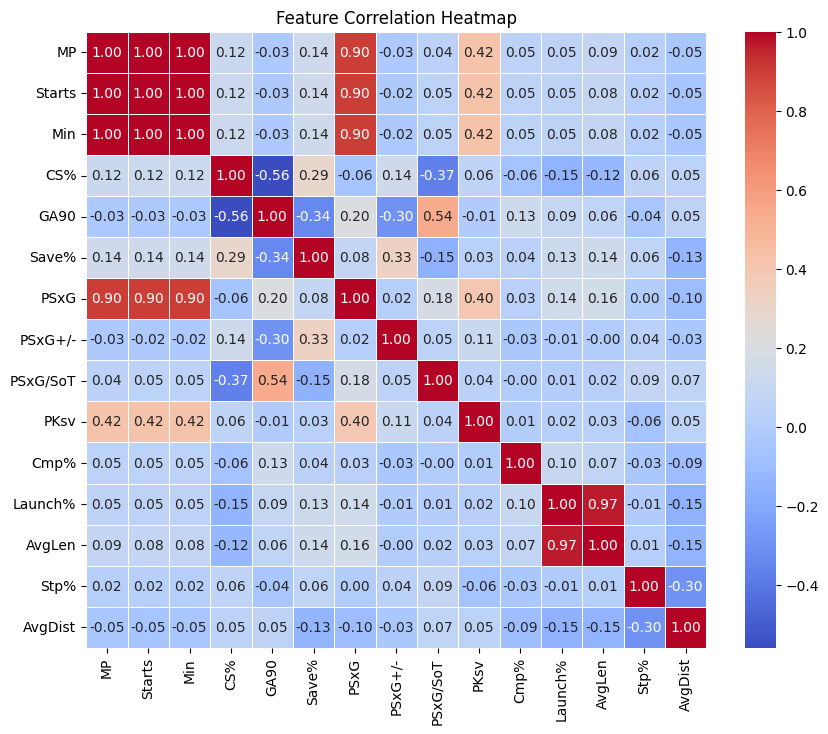

In [12]:
# Compute correlation matrix
corr_matrix = df[features].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

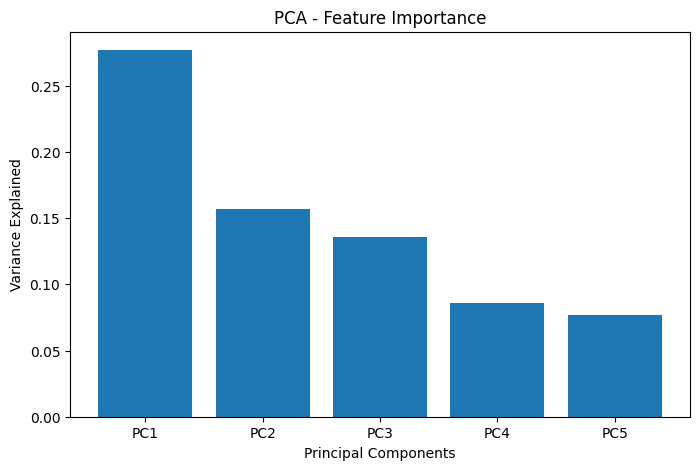

               PC1       PC2       PC3       PC4       PC5
MP       -0.480842  0.037232 -0.071203 -0.007763  0.075252
Starts   -0.481128  0.037869 -0.073185 -0.002786  0.068788
Min      -0.481084  0.037343 -0.072135 -0.004897  0.071155
CS%      -0.044171  0.495745  0.051337 -0.086382  0.104701
GA90     -0.009887 -0.550584 -0.165082  0.071026 -0.048548
Save%    -0.089641  0.305688  0.300180  0.123265 -0.270041
PSxG     -0.458712 -0.104467 -0.046831  0.044105 -0.026485
PSxG+/-  -0.011883  0.239532  0.144021  0.174864 -0.701647
PSxG/SoT -0.041909 -0.394918 -0.151123  0.257480 -0.458529
PKsv     -0.254600  0.033868 -0.073411 -0.137507 -0.248323
Cmp%     -0.033033 -0.102538  0.091603  0.029767  0.189271
Launch%  -0.080850 -0.248348  0.603549 -0.195446 -0.002826
AvgLen   -0.093947 -0.233364  0.603444 -0.183399 -0.010266
Stp%     -0.011992  0.037269  0.094557  0.686450  0.128206
AvgDist   0.045254 -0.000037 -0.259737 -0.557267 -0.284611


In [14]:
# Apply PCA
pca = PCA(n_components=5)  # Reduce to 5 main components
pca.fit(df_scaled)

# Plot explained variance
plt.figure(figsize=(8, 5))
plt.bar(range(1, 6), pca.explained_variance_ratio_, tick_label=[f"PC{i}" for i in range(1, 6)])
plt.xlabel("Principal Components")
plt.ylabel("Variance Explained")
plt.title("PCA - Feature Importance")
plt.show()

# Check which features contribute most to PC1 (main factor)
pca_components = pd.DataFrame(pca.components_, columns=features, index=[f"PC{i}" for i in range(1, 6)])
print(pca_components.T)

# Players similarity model :

In [44]:
# Load dataset
df = pd.read_csv("players_data.csv") 

In [46]:
# Use pd.get_dummies() to one-hot encode the categorical columns
encoder = OneHotEncoder(sparse_output=False)
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
one_hot_encoded = encoder.fit_transform(df[['Pos','Comp']])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['Pos','Comp']))
df = pd.concat([df, one_hot_df], axis=1) # 

In [49]:
df

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,"Pos_FW,DF","Pos_FW,MF",Pos_MF,"Pos_MF,DF","Pos_MF,FW",Comp_de Bundesliga,Comp_eng Premier League,Comp_es La Liga,Comp_fr Ligue 1,Comp_it Serie A
0,0,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,25-028,2000.0,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,Max Aarons,eng ENG,MF,Valencia,es La Liga,25-028,2000.0,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,Rodrigo Abajas,es ESP,DF,Valencia,es La Liga,21-265,2003.0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,James Abankwah,ie IRL,"DF,MF",Udinese,it Serie A,21-016,2004.0,6,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,18-302,2006.0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,2539,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,25-365,1999.0,20,19,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2364,2540,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,27-129,1997.0,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2365,2541,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,26-046,1998.0,15,14,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2366,2542,Milan Đurić,ba BIH,FW,Monza,it Serie A,34-255,1990.0,18,13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [50]:
# Select relevant features for comparison
features = ['MP','Starts','Min','90s',  # basics stats
    'Gls', 'PK', 'PKatt', 'G-PK', 'xG', 'npxG', 'Ast', 'G+A', 'xAG', 'npxG+xAG', 'G+A-PK', 'xG+xAG', # attacking stats
    'Sh_stats_shooting', 'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist', # Shooting stats
    'FK_stats_shooting', 'PK_stats_shooting', 'PKatt_stats_shooting', 'CK_stats_passing_types', # Free kicks and penalty stats
    'SCA','SCA90', 'PassLive', 'PassDead', 'TO', 'Sh_stats_gca','Fld', 'Def', 'GCA', 'GCA90', # Creativity stats
    'Tkl', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd',	'Int', 'Tkl+Int', 'Tkl%', 'Lost', 'Blocks', 'Sh', 'Pass', 'Clr', 'Err', # Defense stats
    'Cmp_stats_passing', 'Att_stats_passing', 'Cmp%_stats_passing', 'TotDist', 'PrgDist', 'xAG_stats_passing', 'xA', 'A-xAG', 
    'KP', '1/3', 'PPA', 'CrsPA', 'Crs_stats_passing_types', 'Live', 'Dead', 'TB', 'Sw', 'Off_stats_passing_types', 'Blocks_stats_passing_types', # Passes stats 
    'Touches', 'Live_stats_possession', 'Def Pen', 'Def 3rd_stats_possession', 'Mid 3rd_stats_possession', 'Att 3rd_stats_possession', 'Att Pen', 
    'Att_stats_possession', 'Succ', 'Succ%', 'Tkld', 'Tkld%', 'Carries', 'TotDist_stats_possession', 'PrgDist_stats_possession', 'PrgC_stats_possession', 
    '1/3_stats_possession', 'CPA', 'Mis', 'Dis', 'Rec', 'PrgR_stats_possession',
    'Pos_DF', 'Pos_MF', 'Pos_DF,MF', 'Pos_FW', 'Pos_MF,FW', 'Pos_FW,MF', 'Pos_MF,DF', 'Pos_FW,DF','Pos_DF,FW'
]

In [51]:
df.fillna(0, inplace=True)

# Normalize numeric data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Fit Nearest Neighbors model
model = NearestNeighbors(n_neighbors=5, metric="cosine")  # Finding 5 similar goalkeepers
model.fit(df_scaled)

NearestNeighbors(metric='cosine')

In [52]:
find_similar_goalkeepers("Bilal Brahimi")

🧤 Similar goalkeepers to Bilal Brahimi:
⚽ Antonín Barák (Similarity Score: 0.92)
⚽ Germán Valera (Similarity Score: 0.89)
⚽ Juan Foyth (Similarity Score: 0.88)
⚽ Lucas Mincarelli (Similarity Score: 0.87)


In [55]:
find_similar_goalkeepers("Jordan Ayew")

🧤 Similar goalkeepers to Jordan Ayew:
⚽ Lucas Michal (Similarity Score: 0.90)
⚽ Takehiro Tomiyasu (Similarity Score: 0.86)
⚽ Arnaud Nordin (Similarity Score: 0.83)
⚽ Andrej Ilic (Similarity Score: 0.83)


In [56]:
find_similar_goalkeepers("Max Aarons")

🧤 Similar goalkeepers to Max Aarons:
⚽ Maximiliano Caufriez (Similarity Score: 0.97)
⚽ Davide Bartesaghi (Similarity Score: 0.97)
⚽ Tom Pouilly (Similarity Score: 0.96)
⚽ Fellipe Jack (Similarity Score: 0.96)
